In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','text'])

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sent = 'hello friends! How are you?'

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize('hello friends! How are you?')

['hello', 'friends', '!', 'How', 'are', 'you', '?']

In [ ]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [ ]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [ ]:
clean

['hello', 'friends', '!', 'How', '?']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]

In [ ]:
clean

['hello', 'friend', '!', 'how', '?']

In [ ]:
sent = 'Hello friends! How are you? We will be learning Python today.'

In [ ]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords]
    return clean

In [ ]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [ ]:
# Pre-Processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [ ]:
x = df['text']
y = df['label']

In [ ]:
x_new = tfidf.fit_transform(x)

In [ ]:
x.shape

(5572,)

In [ ]:
x_new.shape

(5572, 6513)

In [ ]:
tfidf.get_feature_names()

C:\Users\91916\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '050703',
 '0578',
 '06',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07973788240',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '0870',
 '08701213186',
 '08701237397',
 '08701417012',
 '087016248',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704439680

In [ ]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)

In [ ]:
x_train.shape

(4179, 6513)

In [ ]:
x_test.shape

(1393, 6513)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(x_test.toarray())

In [ ]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

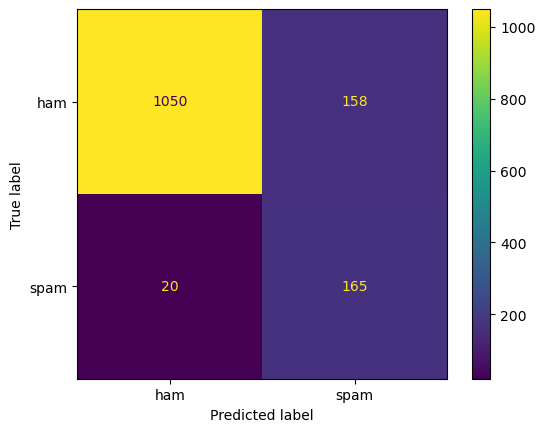

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393

0.8722182340272793


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rf.predict(x_test)

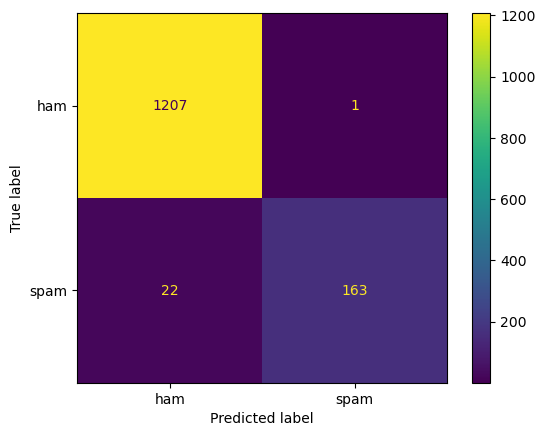

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393

0.9834888729361091


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

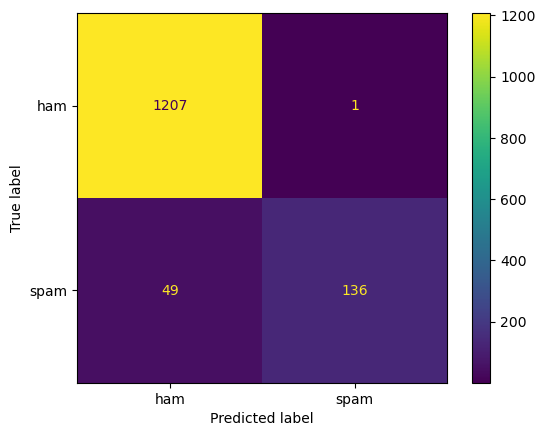

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.84       185

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393

0.9641062455132807


In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'citerion': ['gini','entropy'],
              'max_features': ['sqrt', 'log2'],
              'random_state': [0,1,2,3,4],
              'class_weight': ['balanced', 'balanced_subsample']
             }

In [ ]:
grid = GridSearchCV(rf, param_grid = params, cv = 5, scoring = 'accuracy')

In [ ]:
grid.fit(x_train, y_train)

ValueError: Invalid parameter citerion for estimator RandomForestClassifier(random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.